In [1]:
import pandas as pd

In [2]:
from ipywidgets import interact

In [3]:
import numpy as np

In [4]:
df=pd.read_excel("Call_Centre.xlsx")

In [5]:
df.head(5)

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Column1
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,False
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,False


In [6]:
df.shape

(1772, 10)

In [7]:
df['week']=df['Date'].dt.week

In [8]:
df.head(600)

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Column1,week
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False,53
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False,53
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False,53
3,ID0004,2016-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,False,53
4,ID0005,2016-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,False,53
...,...,...,...,...,...,...,...,...,...,...,...
595,ID0596,2016-01-11 10:26:24.000,Joe,Television,Y,Y,82.0,00:06:40.839000,3.0,False,2
596,ID0597,2016-01-11 10:32:09.600,Greg,Washing Machine,Y,Y,84.0,00:04:45.063000,3.0,False,2
597,ID0598,2016-01-11 10:32:09.600,Martha,Air Conditioner,Y,Y,50.0,00:06:05.890000,4.0,False,2
598,ID0599,2016-01-11 11:05:16.800,Martha,Fridge,N,N,NaN,NaN,NaN,False,2


In [9]:
df.tail(5)

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Column1,week
1767,ID1768,2016-01-31 16:56:38.400,Dan,Television,N,N,NaN,NaN,NaN,False,4
1768,ID1769,2016-01-31 17:08:09.600,Dan,Fridge,N,N,NaN,NaN,NaN,False,4
1769,ID1770,2016-01-31 17:08:09.600,Diane,Toaster,Y,Y,78.0,00:01:02.568000,4.0,False,4
1770,ID1771,2016-01-31 17:34:04.800,Jim,Fridge,Y,Y,91.0,00:02:58.667000,3.0,False,4
1771,ID1772,2016-01-31 17:34:04.800,Greg,Air Conditioner,Y,Y,121.0,00:06:01.008000,2.0,False,4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 11 columns):
Call Id                1772 non-null object
Date                   1772 non-null datetime64[ns]
Agent                  1772 non-null object
Department             1772 non-null object
Answered (Y/N)         1772 non-null object
Resolved               1772 non-null object
Speed of Answer        1455 non-null float64
AvgTalkDuration        1455 non-null object
Satisfaction rating    1455 non-null float64
Column1                1772 non-null bool
week                   1772 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 140.3+ KB


In [11]:
startingdate=df.loc[656,'Date']
startingdate

Timestamp('2016-01-11 17:41:16.800000')

In [12]:
startingdate.month

1

In [13]:
startingdate.day

11

In [14]:
def minofcall(t):    
    li=[]
    li=str(t).split(':')
    if int(li[1])<3:
        return 'less'
    else: 
        return 'more'

In [15]:

def weekstats(x):
    df1=df[df['week']==x]
    df2=df1[df1['Answered (Y/N)']=='Y']
    df3=df1[df1['Speed of Answer']!='NaN']
    tcalls = df1['Call Id'].count()
    callsans=df2['Call Id'].count()
    avgspdofans=df3['Speed of Answer'].mean()
    abndnrate=(((tcalls-callsans)/tcalls)*100)
    satisfaction_rate= df1['Satisfaction rating'].mean()
    df2['LessorMore']= df2['AvgTalkDuration'].map(minofcall)
    df4=df2[df2['LessorMore']=='less']
    shrtcalss=df4['LessorMore'].count()
    shrtcalssper=(((callsans-shrtcalss)/callsans)*100)
    satisfaction=df2.where(df2['Satisfaction rating']<4)['Call Id'].count()
    print("Total calls of the week:-",tcalls)
    print("Tatal calls answered:-",callsans)
    print("The average speed of answer:-",avgspdofans)
    print("The Call abandon rate:-",abndnrate)
    print("The Overall satisfaction:-",satisfaction_rate)
    print("The Number of calls less than 180 seconds:-",shrtcalss)
    print("Rate of call with less than 180 second duration:-",shrtcalssper)
    print("Calls with # or less than 3 satisfaction rate:-",satisfaction)
    

In [16]:
interact(weekstats,x=df['week'].unique())

interactive(children=(Dropdown(description='x', options=(53, 1, 2, 3, 4), value=53), Output()), _dom_classes=(…

<function __main__.weekstats(x)>

In [17]:
weekstats(2)

Total calls of the week:- 390
Tatal calls answered:- 322
The average speed of answer:- 66.73913043478261
The Call abandon rate:- 17.435897435897434
The Overall satisfaction:- 3.437888198757764
The Number of calls less than 180 seconds:- 129
Rate of call with less than 180 second duration:- 59.93788819875776
Calls with # or less than 3 satisfaction rate:- 164


C:\Users\MUKUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [18]:
def agentinfo(ag):
    dfa=df[df['Agent']==ag]
    totcalls=dfa['Call Id'].count()
    dfan=dfa[dfa['Answered (Y/N)']=='Y']
    cans=dfan['Call Id'].count()
    avgsoa=dfan['Speed of Answer'].mean()
    dfres=dfan[dfan['Resolved']=='Y']
    rescalls=dfres['Resolved'].count()
    Rateofrescalls=(((rescalls)/cans)*100)
    print("Total calls for an Agent:-",totcalls)
    print("Total calls answered by an Agent:-",cans)
    print("Average spped of answering calls by an Agent:-",avgsoa)
    print("Total number of resolved calls:-",rescalls)
    print("Percentage of resoved calls:-",Rateofrescalls,"%")

In [19]:
interact(agentinfo,ag=df['Agent'].unique())

interactive(children=(Dropdown(description='ag', options=('Diane', 'Becky', 'Stewart', 'Greg', 'Jim', 'Joe', '…

<function __main__.agentinfo(ag)>

In [20]:
df['weekday']=df['Date'].dt.dayofweek


In [21]:
def weekdaydetails(ag):
    dfw=df[df['Agent']==ag]
    dfw=dfw.sort_values(by='weekday')
    for a in dfw['weekday'].unique():
        dfw1=dfw[dfw['weekday']==a]
        tc=dfw1['Call Id'].count()
        dfw2=dfw1[dfw1['Answered (Y/N)']=='Y']
        ca=dfw2['Call Id'].count()
        asoa=dfw2['Speed of Answer'].mean()
        dfw3=dfw2[dfw2['Resolved']=='Y']
        rcalls=dfw3['Resolved'].count()
        Rateofrcalls=(((rcalls)/ca)*100)
        print("WEEKDAY WISE AGENT DATA")
        print("    For Day : ",a+1)
        print("Total calls for an Agent:",tc)
        print("Total calls answered:",ca)
        print("Average Speed of Answering the call:",asoa)
        print("Total number of resolved calls:",rcalls)
        print("Rate of resolved calls:",Rateofrcalls)
        
        
    
    

In [22]:
interact(weekdaydetails,ag=df['Agent'].unique())

interactive(children=(Dropdown(description='ag', options=('Diane', 'Becky', 'Stewart', 'Greg', 'Jim', 'Joe', '…

<function __main__.weekdaydetails(ag)>

In [23]:
def departmentdetails(dpt):
    dfd=df[df['Department']==dpt]
    totc=dfd['Call Id'].count()
    dfd1=dfd[dfd['Answered (Y/N)']=='Y']
    cla=dfd1['Call Id'].count()
    avsoa=dfd1['Speed of Answer'].mean()
    dfd2=dfd1[dfd1['Resolved']=='Y']
    reca=dfd2['Resolved'].count()
    Ratereca=(((reca)/cla)*100)
    print("DEPARTMENT WISE DATA")
    print("    For Department : ",dpt)
    print("Total calls for department:",totc)
    print("Total calls answered:",cla)
    print("Average Speed of Answering the call:",avsoa)
    print("Total number of resolved calls:",reca)
    print("Rate of resolved calls:",Ratereca)
    

In [24]:
interact(departmentdetails,dpt=df['Department'].unique())

interactive(children=(Dropdown(description='dpt', options=('Washing Machine', 'Air Conditioner', 'Toaster', 'F…

<function __main__.departmentdetails(dpt)>

In [25]:
def departmentSLA(dpt):
    dfd=df[df['Department']==dpt]
    totc=dfd['Call Id'].count()
    dfd1=dfd[dfd['Answered (Y/N)']=='Y']
    cla=dfd1['Call Id'].count()
    abandncalls=(totc-cla)
    abandonrate=(((abandncalls)/totc)*100)
    print("DEPARTMENT WISE DATA")
    print("    For Department : ",dpt)
    print("Total calls for department:",totc)
    print("Total calls answered:",cla)
    print("Abandoned calls:",abandncalls)
    print("Rate of Abandoned Calls:",abandonrate,"%")
    if abandonrate>20:
        print("SLA BREACHED")

In [26]:
interact(departmentSLA,dpt=df['Department'].unique())

interactive(children=(Dropdown(description='dpt', options=('Washing Machine', 'Air Conditioner', 'Toaster', 'F…

<function __main__.departmentSLA(dpt)>

In [27]:
dept=df['Department'].unique()
dept
abd=[]
for a in dept:
    dfd=df[df['Department']==a]
    totc=dfd['Call Id'].count()
    dfd1=dfd[dfd['Answered (Y/N)']=='Y']
    cla=dfd1['Call Id'].count()
    abandncalls=(totc-cla)
    abandonrate=(((abandncalls)/cla)*100)
    #round(abandonrate,2)
    abd.append(abandonrate)
    
print(*abd)

    
        

19.93006993006993 32.11678832116788 18.0327868852459 19.047619047619047 20.50473186119874


In [28]:
abd=list(np.around(np.array(abd),2))

In [29]:
abd

[19.93, 32.12, 18.03, 19.05, 20.5]

In [30]:
import matplotlib.pyplot as plt

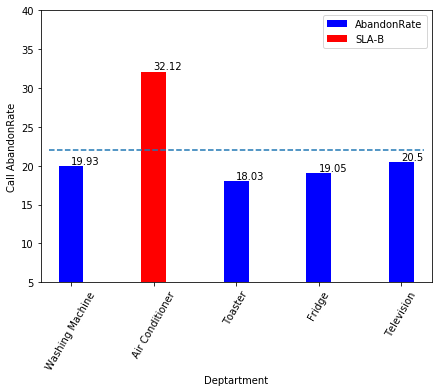

In [31]:
plt.figure(figsize=(7,5))
plt.bar(dept,abd,width=0.3, color='blue', label='AbandonRate')
plt.xlabel("Deptartment")
plt.ylabel("Call AbandonRate")
for i in range(len(dept)):
    plt.annotate(xy=[dept[i],abd[i]+.25],s=abd[i])
plt.ylim(5,40)
plt.bar(dept[abd.index(max(abd))],
        max(abd),width=0.3, color='red', label='SLA-B')
plt.axhline(y=22,xmin=0.02, xmax=0.98, ls='--')
plt.xticks(rotation=60)
plt.legend()
plt.show()


In [32]:
agnt=df['Agent'].unique()
agnt
sta=[]
for b in agnt:
    dfa=df[df['Agent']==b]
    dfan=dfa[dfa['Answered (Y/N)']=='Y']
    osatisfaction=dfan['Satisfaction rating'].mean()
    sta.append(osatisfaction)
print(*sta)    

3.427027027027027 3.384180790960452 3.4838709677419355 3.5260115606936417 3.4331550802139037 3.3548387096774195 3.543859649122807 3.4894736842105263


In [33]:
sta=list(np.around(np.array(sta),2))

In [34]:
sta

[3.43, 3.38, 3.48, 3.53, 3.43, 3.35, 3.54, 3.49]

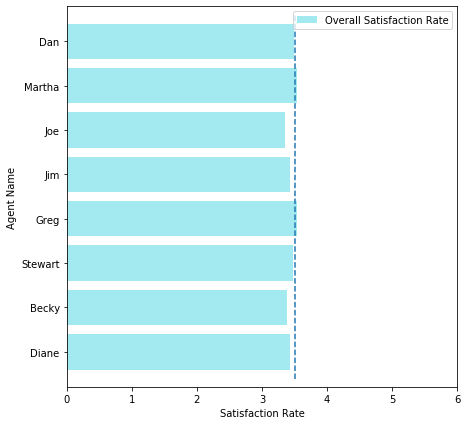

In [35]:
plt.figure(figsize=(7,7))
plt.barh(agnt,sta, color='#2ECEDF70', label='Overall Satisfaction Rate')
plt.xlabel("Satisfaction Rate")
plt.ylabel("Agent Name")
# for i in range(len(agnt)):
#     plt.annotate(xy=[sta[i],agnt[i]+.25],s=sta[i])
plt.xlim(0,6)
plt.axvline(x=3.5,ymin=0.02,ymax=0.98,ls='--')
# plt.bar(dept[abd.index(max(abd))],
#         max(abd),width=0.3, color='red', label='SLA-B')
#plt.axhline(y=22,xmin=0.02, xmax=0.98, ls='--')
#plt.xticks(rotation=90)
plt.legend(loc=1)
plt.show()
